In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

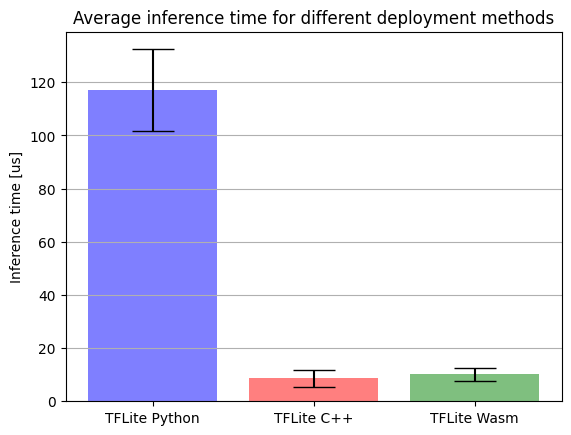

In [2]:
model_type = "dense" #small medium large

#inference time plot mnist
df_inference_tflite_python = pd.read_csv(f"mnist_test/tflite_python_inftime_mnist_{model_type}.csv")
df_inference_tflite_c = pd.read_csv(f"mnist_test/tflite_c_inftime_mnist_{model_type}.csv")
df_inference_tflite_wasm = pd.read_csv(f"mnist_test/tflite_wasm_inftime_mnist_{model_type}.csv")

# df_inference_tflite_python.plot(x='timestamp[ns]', y='inference_time[ns]', kind='line', title='Inference time for TFLite model in Python')
# df_inference_tflite_c.plot(x='timestamp[ns]', y='inference_time[ns]', kind='line', title='Inference time for TensorFlow model in C')
# df_inference_tflite_wasm.plot(x='timestamp[ns]', y='inference_time[ns]', kind='line', title='Inference time for TFLite model in WASM')

df_inference_tflite_python = df_inference_tflite_python[10:]/1e3
df_inference_tflite_c = df_inference_tflite_c[10:]/1e3
df_inference_tflite_wasm = df_inference_tflite_wasm[10:]/1e3


#jump the first 10 values
#average inference time
average_inference_tflite_python = df_inference_tflite_python['inference_time[ns]'].mean()
average_inference_tflite_c = df_inference_tflite_c['inference_time[ns]'].mean()
average_inference_tflite_wasm = df_inference_tflite_wasm['inference_time[ns]'].mean()

#standard deviation
std_inference_tflite_python = df_inference_tflite_python['inference_time[ns]'].std()
std_inference_tflite_c = df_inference_tflite_c['inference_time[ns]'].std()
std_inference_tflite_wasm = df_inference_tflite_wasm['inference_time[ns]'].std()

#plot bar chart
fig, ax = plt.subplots()
inference_times = [average_inference_tflite_python,  average_inference_tflite_c, average_inference_tflite_wasm]
std_inference_times = [std_inference_tflite_python,  std_inference_tflite_c, std_inference_tflite_wasm]
labels = ['TFLite Python', 'TFLite C++', 'TFLite Wasm']
x = np.arange(len(labels))
ax.bar(x, inference_times, yerr=std_inference_times, align='center', alpha=0.5, ecolor='black', capsize=15, color= ['blue', 'red', 'green'])
ax.set_ylabel('Inference time [us]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Average inference time for different deployment methods')
ax.yaxis.grid(True)
plt.show()



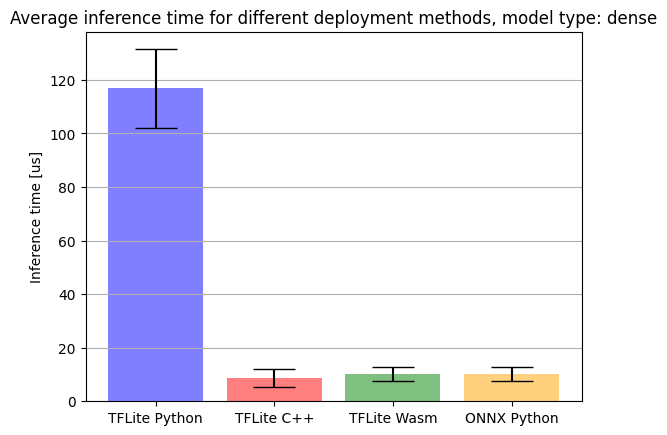

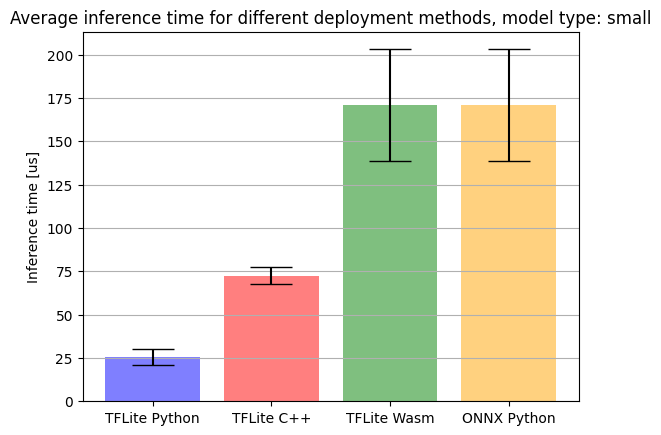

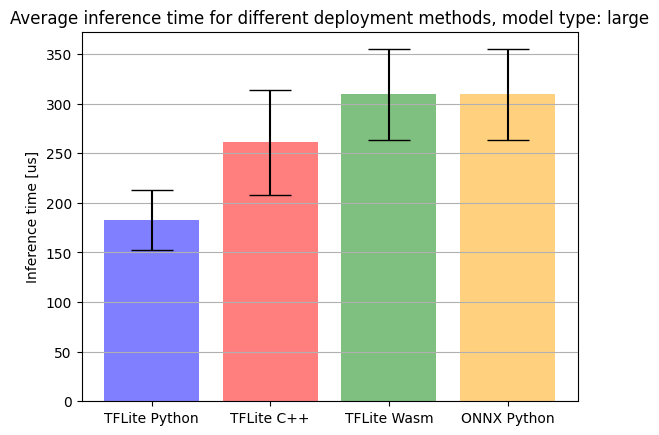

In [3]:
cut_value = 2000

for model_type in ["dense","small","large"]:
    df_inference_tflite_python = pd.read_csv(f"mnist_test/tflite_python_inftime_mnist_{model_type}.csv")
    df_inference_tflite_c = pd.read_csv(f"mnist_test/tflite_c_inftime_mnist_{model_type}.csv")
    df_inference_tflite_wasm = pd.read_csv(f"mnist_test/tflite_wasm_inftime_mnist_{model_type}.csv")
    df_inference_onnx_python = pd.read_csv(f"mnist_test/onnx_python_inftime_mnist_{model_type}.csv")

    # df_inference_tflite_python.plot(x='timestamp[ns]', y='inference_time[ns]', kind='line', title='Inference time for TFLite model in Python')
    # df_inference_tflite_c.plot(x='timestamp[ns]', y='inference_time[ns]', kind='line', title='Inference time for TensorFlow model in C')
    # df_inference_tflite_wasm.plot(x='timestamp[ns]', y='inference_time[ns]', kind='line', title='Inference time for TFLite model in WASM')
    

    df_inference_tflite_python = df_inference_tflite_python[cut_value:]/1e3
    df_inference_tflite_c = df_inference_tflite_c[cut_value:]/1e3
    df_inference_tflite_wasm = df_inference_tflite_wasm[cut_value:]/1e3
    df_inference_onnx_python = df_inference_onnx_python[cut_value:]/1e3


    #jump the first 10 values
    #average inference time
    average_inference_tflite_python = df_inference_tflite_python['inference_time[ns]'].mean()
    average_inference_tflite_c = df_inference_tflite_c['inference_time[ns]'].mean()
    average_inference_tflite_wasm = df_inference_tflite_wasm['inference_time[ns]'].mean()
    average_inference_onnx_python = df_inference_onnx_python['inference_time[ns]'].mean()

    #standard deviation
    std_inference_tflite_python = df_inference_tflite_python['inference_time[ns]'].std()
    std_inference_tflite_c = df_inference_tflite_c['inference_time[ns]'].std()
    std_inference_tflite_wasm = df_inference_tflite_wasm['inference_time[ns]'].std()
    std_inference_onnx_python = df_inference_onnx_python['inference_time[ns]'].std()

    #plot bar chart
    fig, ax = plt.subplots()
    inference_times = [average_inference_tflite_python,  average_inference_tflite_c, average_inference_tflite_wasm, average_inference_onnx_python]
    std_inference_times = [std_inference_tflite_python,  std_inference_tflite_c, std_inference_tflite_wasm, std_inference_onnx_python]
    labels = ['TFLite Python', 'TFLite C++', 'TFLite Wasm', 'ONNX Python']
    x = np.arange(len(labels))
    ax.bar(x, inference_times, yerr=std_inference_times, align='center', alpha=0.5, ecolor='black', capsize=15, color= ['blue', 'red', 'green', 'orange'])
    ax.set_ylabel('Inference time [us]')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_title('Average inference time for different deployment methods, model type: '+model_type)
    ax.yaxis.grid(True)
    #save figure as a pdf
    plt.savefig('figures/Average_inference_time_for_different_deployment_methods_model_type_'+model_type+".pdf")

<Axes: title={'center': 'Inference time for ONNX model in Python'}, xlabel='timestamp[ns]'>

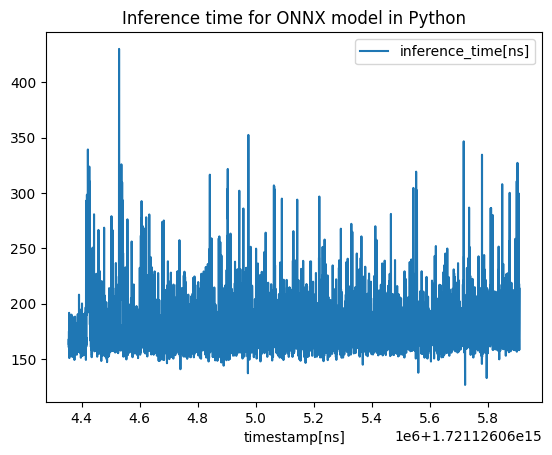

In [18]:
model_type = "dense"

df_inference_onnx_python = pd.read_csv(f"mnist_test/onnx_python_inftime_mnist_{model_type}.csv")

df_inference_onnx_python = df_inference_onnx_python[2000:]/1e3

#plot 

df_inference_onnx_python.plot(x='timestamp[ns]', y='inference_time[ns]', kind='line', title='Inference time for ONNX model in Python')


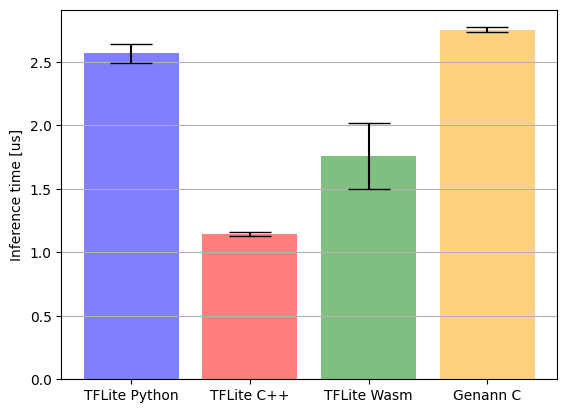

In [9]:
#print figures for regression

df_inference_tflite_python_reg = pd.read_csv(f"regression_test/tflite_python_inftime_reg.csv")
df_inference_tflite_c_reg = pd.read_csv(f"regression_test/tflite_c_inftime_reg.csv")
df_inference_tflite_wasm_reg = pd.read_csv(f"regression_test/tflite_wasm_inftime_reg.csv")
df_genann_c_reg = pd.read_csv(f"regression_test/genann_times_reg.csv")

#delete column train_time[ns]

df_inference_genann_c_reg = df_genann_c_reg.drop(columns=['train_time[ns]'])

#jump the first 5 values
df_inference_tflite_python_reg = df_inference_tflite_python_reg[5:]/1e3
df_inference_tflite_c_reg = df_inference_tflite_c_reg[5:]/1e3
df_inference_tflite_wasm_reg = df_inference_tflite_wasm_reg[5:]/1e3
df_inference_genann_c_reg = df_inference_genann_c_reg[5:]/1e3

#average inference time
average_inference_tflite_python_reg = df_inference_tflite_python_reg['inference_time[ns]'].mean()
average_inference_tflite_c_reg = df_inference_tflite_c_reg['inference_time[ns]'].mean()
average_inference_tflite_wasm_reg = df_inference_tflite_wasm_reg['inference_time[ns]'].mean()
average_inference_genann_c_reg = df_inference_genann_c_reg['train_inference_time[ns]'].mean()

#standard deviation
std_inference_tflite_python_reg = df_inference_tflite_python_reg['inference_time[ns]'].std()
std_inference_tflite_c_reg = df_inference_tflite_c_reg['inference_time[ns]'].std()
std_inference_tflite_wasm_reg = df_inference_tflite_wasm_reg['inference_time[ns]'].std()
std_inference_genann_c_reg = df_inference_genann_c_reg['train_inference_time[ns]'].std()

#plot bar chart
fig, ax = plt.subplots()
inference_times = [average_inference_tflite_python_reg,  average_inference_tflite_c_reg, average_inference_tflite_wasm_reg, average_inference_genann_c_reg]
std_inference_times = [std_inference_tflite_python_reg,  std_inference_tflite_c_reg, std_inference_tflite_wasm_reg, std_inference_genann_c_reg]
labels = ['TFLite Python', 'TFLite C++', 'TFLite Wasm', 'Genann C']
x = np.arange(len(labels))
ax.bar(x, inference_times, yerr=std_inference_times, align='center', alpha=0.5, ecolor='black', capsize=15, color= ['blue', 'red', 'green', 'orange'])
ax.set_ylabel('Inference time [us]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.set_title('Average inference time for different deployment methods, regression test')
ax.yaxis.grid(True)
plt.savefig('figures/Average_inference_time_for_different_deployment_methods_regression.pdf')



